In [53]:
import numpy as np
import numpy as xp
import scipy as scipy

import matplotlib.pyplot as plt

In [101]:
dim = 1000

B = np.random.randn(dim, dim)
eig_vals, U = np.linalg.eigh(B @ B.T)

eig_vals = np.logspace(-4, 4, dim, base=10)
eig_vals[-2] = eig_vals[-1]

A = U @ np.diag(eig_vals) @ U.T

In [108]:
eig_vals[-3:]

array([ 9637.93479962, 10000.        , 10000.        ])

In [106]:
%%time
out = scipy.sparse.linalg.eigsh(A, k=2, which='LM', maxiter=10_000, tol=1e-8)

CPU times: user 46.8 ms, sys: 2.76 ms, total: 49.5 ms
Wall time: 51.7 ms


In [105]:
out

array([ 9637.93479962, 10000.        ])

# Nesterov

In [81]:
from Nesterov import Nesterov

In [82]:
x = np.random.normal(0, 1, dim)
solver = Nesterov(A, x, lr=100, save_history=True, which='max', tol=1e-10)

In [83]:
%%time
flag, max_eigval, _ = solver.run(1000)

max 468 9999.999999999887 9999.999999999905
CPU times: user 97.3 ms, sys: 3.27 ms, total: 101 ms
Wall time: 103 ms


In [34]:
def power_iteration(A, b_k, num_iterations, save_history=True):
    if save_history:
        history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm
        
        if save_history:
            history[i] = b_k @ A @ b_k
    
    if save_history:
        return b_k, history
    return b_k

In [67]:
x = np.random.normal(0, 1, dim)
out, history = power_iteration(A, x, 600)

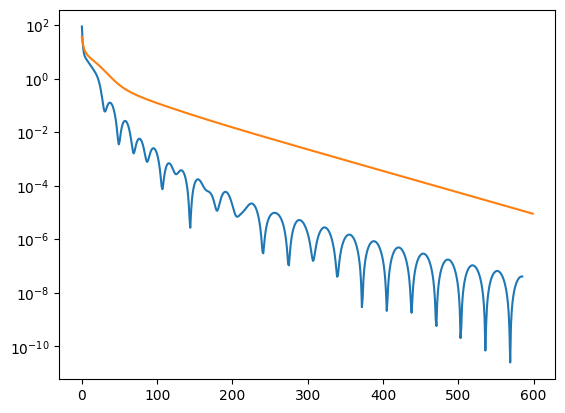

In [68]:
plt.plot(100 - solver.history);
plt.plot(100 - history);

plt.yscale('log');

In [87]:
x = np.random.normal(0, 1, dim)
lr = 0.97 / (2 * max_eigval)
solver = Nesterov(A, x, lr=lr, save_history=True, which='min', tol=1e-10)

In [88]:
%%time
flag, min_eigval, _ = solver.run(50_000)

CPU times: user 8.06 s, sys: 47.7 ms, total: 8.1 s
Wall time: 8.13 s


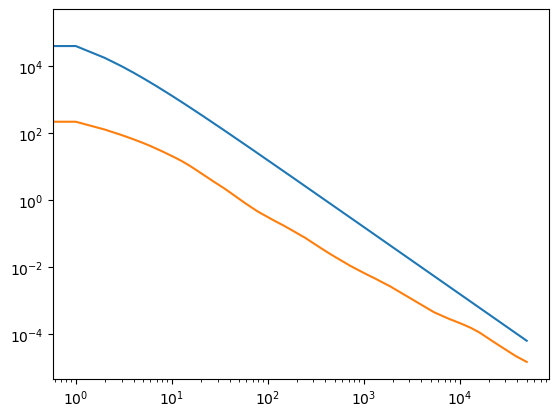

In [89]:
N = len(solver.history)

plt.plot(16 * max_eigval / (np.arange(1, N + 1) ** 2))
plt.plot(solver.history - eig_vals.min())
plt.loglog();

In [93]:
c = 16 * max_eigval / (N ** 2)
c

6.399999999999928e-05

In [94]:
solver.history[-1] - c, solver.history[-1] + c

(5.0976837327189065e-05, 0.00017897683732718764)

In [12]:
solver.history[-1]

np.float64(0.010006485972791015)

# True

In [8]:
n = int(1e5)
z = 0
l = 0
alpha = (np.sqrt(5) - 1) / 2

n_vals = xp.arange(-n, n + 1, 1)
b = 2 * l * xp.cos(2 * np.pi * n_vals * alpha)
a = xp.ones(2 * n + 3)

In [9]:
data = xp.concatenate([a, b - z, a])
row_index = xp.concatenate([xp.arange(len(a)), xp.arange(len(b)) + 1, xp.arange(len(a)) + 2])
col_index = xp.concatenate([xp.arange(len(a)), xp.arange(len(b)), xp.arange(len(a))])
B = scipy.sparse.csc_matrix((data, (row_index, col_index)))

A = B.T @ B
dim = 2 * n + 3

In [57]:
%%time
x = np.random.normal(0, 1, len(a))
out = scipy.sparse.linalg.lobpcg(B.T @ B, x.reshape(-1, 1), largest=True, 
                                 maxiter=10_000, tol=1e-8)

CPU times: user 30.8 s, sys: 4.77 s, total: 35.6 s
Wall time: 35.7 s


<timed exec>:2: UserWarning: Exited at iteration 10000 with accuracies 
[8.63681211e-07]
not reaching the requested tolerance 1e-08.
Use iteration 10001 instead with accuracy 
8.636812109807884e-07.

<timed exec>:2: UserWarning: Exited postprocessing with accuracies 
[6.77834698e-07]
not reaching the requested tolerance 1e-08.


In [61]:
out[0]

array([3.99999994])

In [62]:
x = np.random.normal(0, 1, dim)
nesterov_solver = Nesterov(A, x, lr=100, save_history=False, which='max', tol=1e-10)

In [63]:
%%time
flag, max_eig_val, _ = nesterov_solver.run(10_000)
flag, max_eig_val, np.sqrt(max_eig_val)

max 6037 3.999999709216402 3.999999709116452
CPU times: user 5.27 s, sys: 1.73 s, total: 7 s
Wall time: 7.01 s


(False, np.float64(3.999999709216402), np.float64(1.9999999273040991))

In [64]:
out[0], max_eig_val

(array([3.99999994]), np.float64(3.999999709216402))

In [29]:
# x = np.random.normal(0, 1, dim)
lr = 0.99 / (2 * max_eig_val)
nesterov_solver = Nesterov(A, x, lr=lr, save_history=True, which='min', tol=1e-10)

In [30]:
ord_accuracy = 5
N = int(2 * np.sqrt(max_eig_val) * (10 ** ord_accuracy))
N

1999999

In [31]:
%%time
flag, min_eig_val, _ = nesterov_solver.run(N)
min_eig_val, np.sqrt(min_eig_val)

min 3687
CPU times: user 30.5 ms, sys: 5.58 ms, total: 36.1 ms
Wall time: 38.1 ms


(np.float64(0.00018695515885228052), np.float64(0.013673154678137761))

In [32]:
len(nesterov_solver.history)

3688

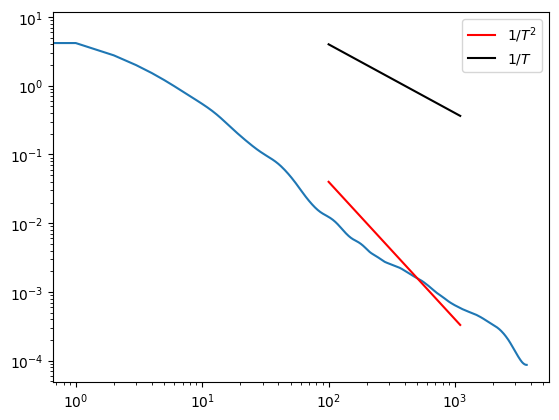

In [33]:
plt.plot(nesterov_solver.history - eig_vals.min() ** 2)
# plt.plot(nesterov_solver.history[:-1] - nesterov_solver.history[1:])
start_index = 100
x_vals = np.arange(start_index, start_index + 1000)
plt.plot(x_vals, 4 * max_eig_val * (1 / x_vals) ** 2, color='red', label='$1/T^2$')
plt.plot(x_vals, 4 * max_eig_val * (1 / x_vals), color='black', label='$1/T$')
plt.legend()
plt.loglog();

# GD

In [2]:
from GD import GD

In [49]:
A = np.array([[0, 1], [1, 0]])
dim = 2
eig_vals, eig_vecs = np.linalg.eig(A)
# eig_vals = np.array([1, 1])
# A = eig_vecs @ np.diag(eig_vals) @ eig_vecs

In [39]:
np.linalg.eig(A)[0]

array([ 1., -1.])

In [40]:
dim = 100

B = np.random.rand(dim, dim)
eig_vals, U = np.linalg.eigh(B @ B.T)

eig_vals = np.logspace(-2, 2, dim, base=10) 
# eig_vals[-2] = eig_vals[-1]
A = U @ np.diag(eig_vals) @ U.T

In [41]:
eig_vals[0], eig_vals[-1]

(0.01, 100.0)

In [50]:
%%time
x = np.random.normal(0, 1, dim)
x = x / np.sqrt(x @ x)
lr = 50
num_iters = 1000
history = np.zeros(num_iters)
for i in range(num_iters):
    grad = A @ x

    x += lr * grad
    x /= xp.sqrt(x @ x)
    
    history[i] = x @ A @ x

CPU times: user 28.1 ms, sys: 10.3 ms, total: 38.4 ms
Wall time: 32.9 ms


In [51]:
x = np.random.normal(0, 1, dim)
x = x / np.sqrt(x @ x)
num_iters = 1000
power_history = np.zeros(num_iters)
for i in range(num_iters):
    x = A @ x
    x /= xp.sqrt(x @ x)
    
    power_history[i] = x @ A @ x

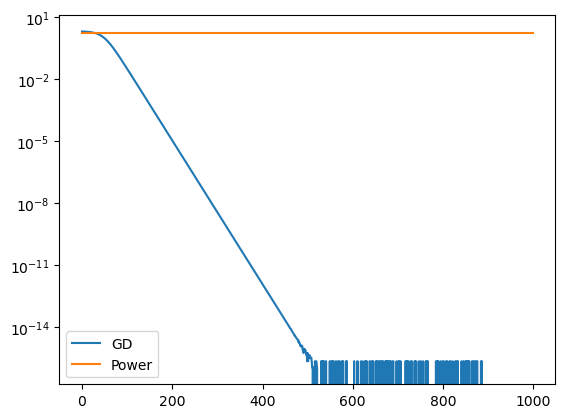

In [52]:
plt.plot(abs(eig_vals.max() - history), label='GD')
plt.plot(abs(eig_vals.max() - power_history), label='Power')
plt.yscale('log')
plt.legend();

In [77]:
max_eigval = history[-1]

In [84]:
%%time
x = np.random.normal(0, 1, dim)
x = x / np.sqrt(x @ x)
lr = 100
num_iters = 10_000
history = np.zeros(num_iters)
for i in range(num_iters):
    grad = A @ x - max_eigval * x

    x += lr * grad
    x /= xp.sqrt(x @ x)
    
    history[i] = x @ A @ x

CPU times: user 94.6 ms, sys: 2.13 ms, total: 96.7 ms
Wall time: 95.5 ms


In [85]:
history[-1]

np.float64(0.014849794964606988)

In [96]:
A = np.random.normal(0, 1, (10, 10))
_, U = np.linalg.eig(A @ A.T)

A = np.random.normal(0, 1, (10, 10))
_, V = np.linalg.eig(A @ A.T)

In [99]:
A = U @ np.diag(np.logspace(-2, 2, 10)) @ U.T

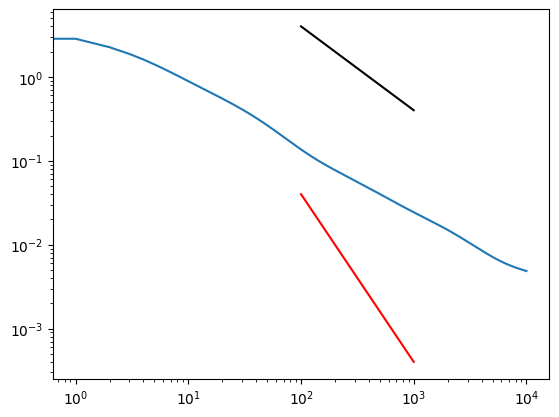

In [86]:
plt.plot(history - eig_vals.min())

x_vals = np.arange(100, 1000)
plt.plot(x_vals, 4 * max_eigval * (1 / x_vals) ** 2, color='red', label='$1/T^2$')
plt.plot(x_vals, 4 * max_eigval * (1 / x_vals), color='black', label='$1/T$')

plt.loglog();

In [290]:
eig_vecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [291]:
history[-1]

np.float64(0.0)

In [292]:
x

array([-0.33905713, -0.94076579])

In [273]:
history[-1]

np.float64(0.0)

In [274]:
%%time
# POWER
x = np.zeros(dim)
x[0] = 1
x = x / np.sqrt(x @ x)
num_iters = 1_000
new_history = np.zeros(num_iters)
for i in range(num_iters):
    x[:] = A @ x
    x /= xp.sqrt(x @ x)
    
    new_history[i] = x @ A @ x

CPU times: user 10.9 ms, sys: 720 µs, total: 11.6 ms
Wall time: 11.3 ms


In [275]:
new_history[-1]

np.float64(-2.2371143170757382e-17)

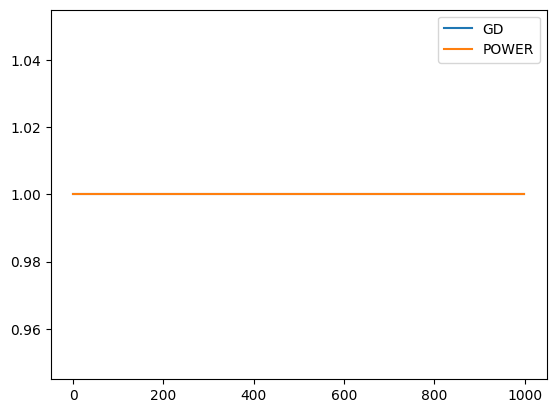

In [277]:
plt.plot(abs(history - eig_vals.max()), label='GD')
plt.plot(abs(new_history - eig_vals.max()), label='POWER')
plt.legend()
# plt.yscale('log');

In [70]:
max_eigval = history[-1]
max_eigval

np.float64(0.9999999999999996)

In [90]:
x = np.random.normal(0, 1, dim)
x = x / np.sqrt(x @ x)

lr = 0.99 / (np.sqrt(2 * max_eigval))
num_iters = 1000
history = np.zeros(num_iters)

for i in range(num_iters):
    Ax = A @ x
    grad = Ax / np.sqrt(x @ Ax)

    x[:] -= lr * grad
    x /= xp.sqrt(x @ x)
    
    history[i] = np.sqrt(x @ A @ x)

In [91]:
history[-1]

np.float64(0.3535310171382424)

In [92]:
np.sqrt(eig_vals.min())

np.float64(0.31622776601683794)

In [93]:
history

array([0.35164743, 0.24979342, 0.21855792, 0.2742064 , 0.36304271,
       0.34061042, 0.35566554, 0.35033358, 0.35475195, 0.35334944,
       0.35479948, 0.35442995, 0.35494848, 0.35486292, 0.35506129,
       0.35504771, 0.35512427, 0.35512187, 0.35514651, 0.35513969,
       0.35513973, 0.35512634, 0.35511383, 0.35509526, 0.3550762 ,
       0.35505435, 0.355032  , 0.35500845, 0.35498468, 0.35496055,
       0.35493649, 0.35491251, 0.3548888 , 0.35486541, 0.35484243,
       0.35481989, 0.35479784, 0.35477628, 0.35475523, 0.35473469,
       0.35471467, 0.35469515, 0.35467614, 0.35465762, 0.35463957,
       0.35462199, 0.35460487, 0.35458819, 0.35457193, 0.35455608,
       0.35454063, 0.35452556, 0.35451087, 0.35449653, 0.35448254,
       0.35446889, 0.35445556, 0.35444254, 0.35442982, 0.3544174 ,
       0.35440526, 0.35439339, 0.35438179, 0.35437044, 0.35435934,
       0.35434849, 0.35433786, 0.35432746, 0.35431728, 0.35430731,
       0.35429755, 0.35428798, 0.35427861, 0.35426943, 0.35426

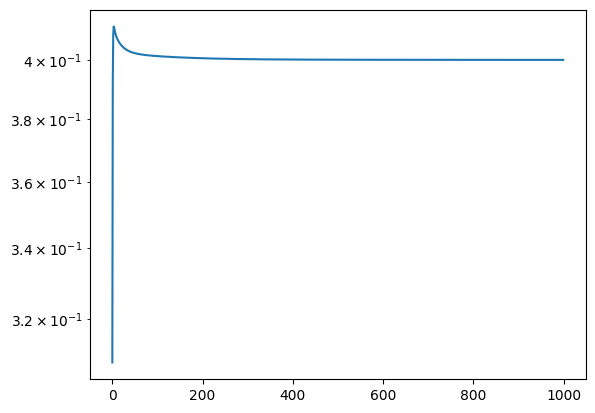

In [89]:
plt.plot(abs(history - eig_vals.min()))
plt.yscale('log');

In [32]:
flag, num_iters, eig_val, eig_vec = solver.run(50_000)
flag, num_iters, np.sqrt(eig_val)

(False, 50000, np.float64(0.009999999999999997))

In [33]:
solver.rho

{'min': np.float64(9.999999999999994e-05),
 'max': np.float64(0.010000000000000004)}

In [40]:
np.linalg.eigh(B.T @ B)[0]

array([1.00000000e-04, 1.66810054e-04, 2.78255940e-04, 4.64158883e-04,
       7.74263683e-04, 1.29154967e-03, 2.15443469e-03, 3.59381366e-03,
       5.99484250e-03, 1.00000000e-02])

In [37]:
start_index = 200
block_size = 100

x_vals = np.arange(start_index, start_index + block_size)
X = np.concatenate([np.ones_like(x_vals).reshape(-1, 1),
                    np.log(x_vals).reshape(-1, 1)], axis=1)

y = np.log(solver.history[start_index: start_index + block_size] - eig_vals.min() ** 2)

coef, *_ = np.linalg.lstsq(X, y, rcond=None)
coef

array([-4.01206293, -1.20134474])

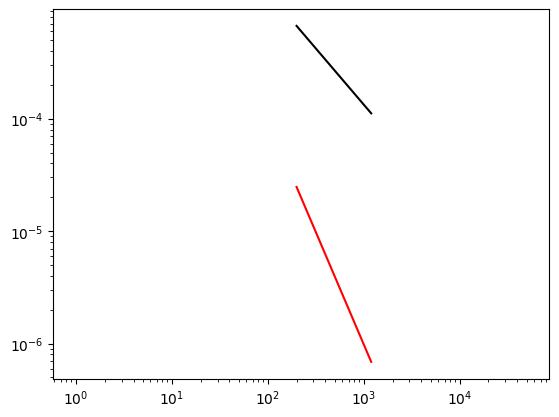

In [38]:
plt.plot(solver.history - 0.027208348761476892)

x_vals = np.arange(start_index, start_index + 1000)
plt.plot(x_vals, np.exp(coef[0] + 4) * (1 / x_vals) ** 2, color='red')
plt.plot(x_vals, np.exp(coef[0] + 2) * (1 / x_vals), color='black')
plt.plot()
plt.loglog();

# CG

In [4]:
from CG import ConjugateGradient

In [5]:
x = np.random.normal(0, 1, len(a))

cg_solver = ConjugateGradient(B.T @ B, x, 1)

In [6]:
flag, num_iters, eig_val, eig_vec = cg_solver.run(30_000)
flag, num_iters, np.sqrt(eig_val)

(True, 212, np.float64(0.04984586190042752))

In [7]:
flag, num_iters, eig_val, eig_vec = cg_solver.run(30_000)
flag, num_iters, np.sqrt(eig_val)

(False, 30000, np.float64(0.002477811644489211))

In [8]:
flag, num_iters, eig_val, eig_vec = cg_solver.run(30_000)
flag, num_iters, np.sqrt(eig_val)

(False, 30000, np.float64(0.002244715162178575))

In [9]:
flag, num_iters, eig_val, eig_vec = cg_solver.run(30_000)
flag, num_iters, np.sqrt(eig_val)

(False, 30000, np.float64(0.0020639185890437535))

In [55]:
x = np.random.normal(0, 1, len(a))
out = xcipy.sparse.linalg.lobpcg(nesterov_solver.A, x.reshape(-1, 1), 
                                 largest=False, maxiter=10_000, tol=1e-8)

/var/folders/99/5f_qszrn5y132sfcdd12k2f80000gn/T/ipykernel_32243/1360428029.py:2: UserWarning: Exited at iteration 10000 with accuracies 
[4.39577432e-07]
not reaching the requested tolerance 1e-08.
Use iteration 10000 instead with accuracy 
4.273682212507733e-07.

  out = xcipy.sparse.linalg.lobpcg(nesterov_solver.A, x.reshape(-1, 1),
/var/folders/99/5f_qszrn5y132sfcdd12k2f80000gn/T/ipykernel_32243/1360428029.py:2: UserWarning: Exited postprocessing with accuracies 
[4.2736822e-07]
not reaching the requested tolerance 1e-08.
  out = xcipy.sparse.linalg.lobpcg(nesterov_solver.A, x.reshape(-1, 1),


In [56]:
np.sqrt(out[0])

array([0.00031584])

In [57]:
out[0]

array([9.97537086e-08])